# The Sparks Foundation -GRIP - Data Science & Business Analytics -Dec 2021


## Task 1:Prediction Using supervised ML 

### Author : Divyanshu Srivastav

In this task we will predict the percentage of student is expected to score based upon the number of hours they studied.
This is simple linear regression task as it involves just two variables-Hours and Scores.

# Importing required libraries

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

# Reading data from source

In [2]:
#Reading dataset from the link provided in task list using Pandas.
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data.head(5)
# To obtain basic overview of data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# To gathering more informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()
# To collect basic statistical informations

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualize the Data 

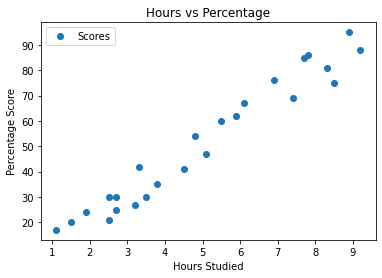

In [5]:
# plotting the distribution of scores.
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, Here we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

In [6]:
# Reshaping the data dividing it into attribute and labels
X=data.iloc[:, :-1]                        #Gives values until the last columns.
Y=data.iloc[:, 1]                         #Gives only the last column

#  Spliting the data into Training and testing dataset

In [7]:
#Spliting the data into training and test set.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0) 
#test_size=0.2, means  that only 20% data is used for testing.

# Fitting a Linear Regression line to the training dataset

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

#  Plotting the Regression Line

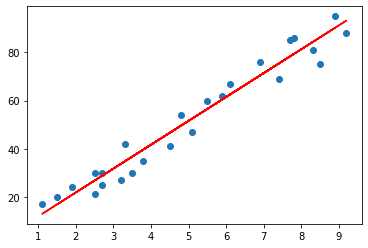

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color="red");
plt.show()

##  Predicting  values

In [11]:
print(X_test)                                                    # Testing data - In Hours
y_pred = regressor.predict(X_test)                               # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


# Comparing actual to predict values

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


<AxesSubplot:xlabel='Scores', ylabel='Density'>

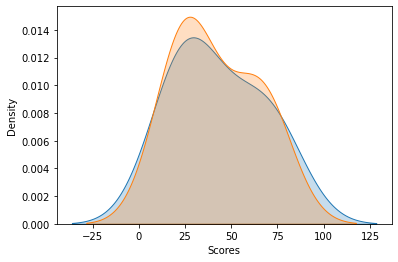

In [13]:
sns.kdeplot(y_pred, shade=True)
sns.kdeplot(data=y_test, shade=True)

## Predicted Score

In [14]:
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of Hours = {}".format([hours]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737535


d:\default program files\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
